You’ll want 3 main visual types:

Leaderboard tables → top-N per benchmark (simple, clear).

Heatmap → models (rows) × benchmarks (cols), color = performance.

Radar charts → capability profile (reasoning, coding, multimodal, efficiency, safety).

Optional: Timeline plots of release date vs performance score.

# Normalization and Visualizations

## 1 Loading Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import numpy as np

## 2 Loading Data

In [4]:
df_benchmarks = pd.read_csv("data/benchmarks_2025.csv")
df_efficiency = pd.read_csv("data/efficiency_2025.csv")
df_metadata = pd.read_csv("data/metadata_models.csv")

## 3 Normalizing Scores

In [5]:
scaler = MinMaxScaler(feature_range=(0,100))
df_benchmarks["Score_Normalized"] = df_benchmarks.groupby("Benchmark")["Score"].transform(
    lambda x: scaler.fit_transform(x.values.reshape(-1,1)).flatten()
)

## 4 Leaderboard Tables

In [7]:
for bench in df_benchmarks["Benchmark"].unique():
    print(f"\n Leaderboard for {bench}")
    display(df_benchmarks[df_benchmarks["Benchmark"]==bench]
            .sort_values("Score", ascending=False)
            [["Model", "Provider", "Score", "Unit", "Rank"]])


 Leaderboard for Humanity’s Last Exam


,Model,Provider,Score,Unit,Rank
0,GPT-5,OpenAI,25.32,%,1
1,Gemini 2.5 Pro Preview,Google DeepMind,21.64,%,2
2,Qwen3-235B-Thinking,Alibaba,15.43,%,4
4,o3-mini (high),OpenAI,13.37,%,6
3,Claude 4.1 Opus (Thinking),Anthropic,11.52,%,5



 Leaderboard for MMLU-Pro


,Model,Provider,Score,Unit,Rank
5,Gemini 2.5 Pro Exp,Google DeepMind,84.1,%,1
6,o1,OpenAI,83.5,%,2
7,Gemini 2.0 Flash,Google DeepMind,77.4,%,3


## 5 Heatmap

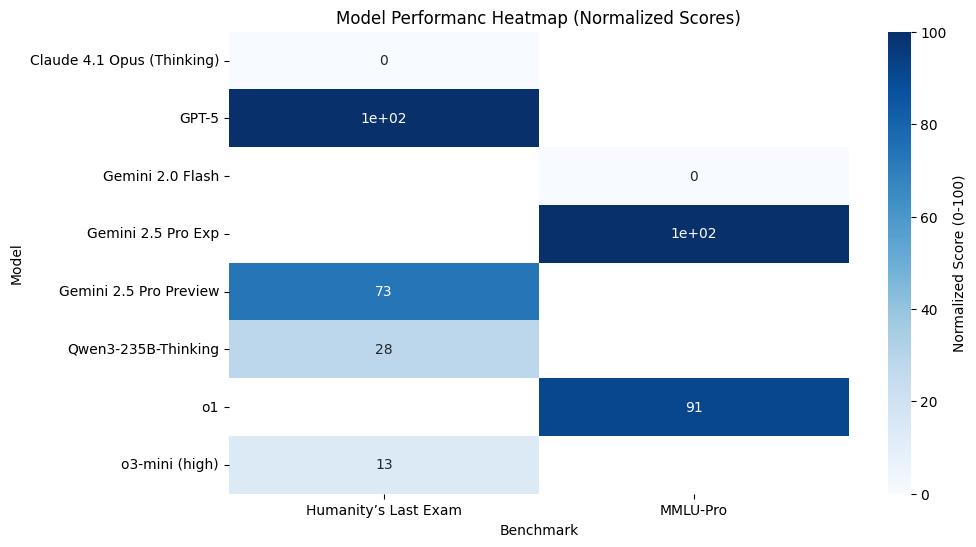

In [8]:
heatmap_data = df_benchmarks.pivot(index="Model", columns="Benchmark", values="Score_Normalized")

plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, annot=True, cmap="Blues", cbar_kws={'label': 'Normalized Score (0-100)'})
plt.title("Model Performanc Heatmap (Normalized Scores)")
plt.show()